('start on:', 'Run time: 2019-04-05 12:05:53')
('plot files:', ['debug/2/201903100000001_342.wav', 'debug/2/201903100000001_357.wav', 'debug/2/201903100000001_155.wav', 'debug/2/201903100000001_169.wav', 'debug/2/201903100000001_432.wav', 'debug/2/201903100000001_230.wav', 'debug/2/201903100000001_351.wav', 'debug/2/201903100000001_025.wav'])
('debug/2/201903100000001_342.wav', (48000,), 22050)
('load file :', 'debug/2/201903100000001_342.wav', 48000)
('debug/2/201903100000001_357.wav', (48000,), 22050)
('load file :', 'debug/2/201903100000001_357.wav', 48000)
('debug/2/201903100000001_155.wav', (48000,), 22050)
('load file :', 'debug/2/201903100000001_155.wav', 48000)
('debug/2/201903100000001_169.wav', (48000,), 22050)
('load file :', 'debug/2/201903100000001_169.wav', 48000)
('debug/2/201903100000001_432.wav', (48000,), 22050)
('load file :', 'debug/2/201903100000001_432.wav', 48000)
('debug/2/201903100000001_230.wav', (48000,), 22050)
('load file :', 'debug/2/201903100000001_230.wa

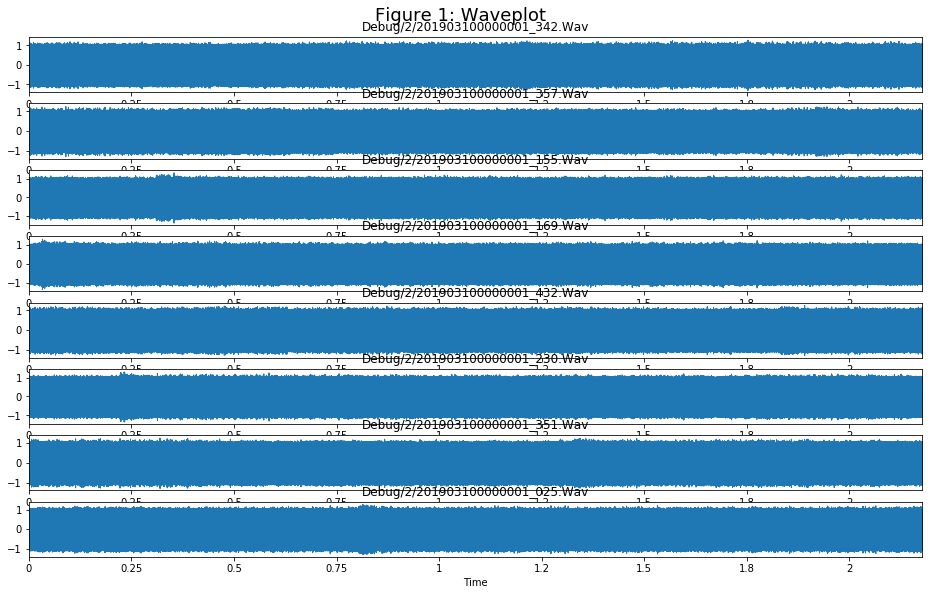

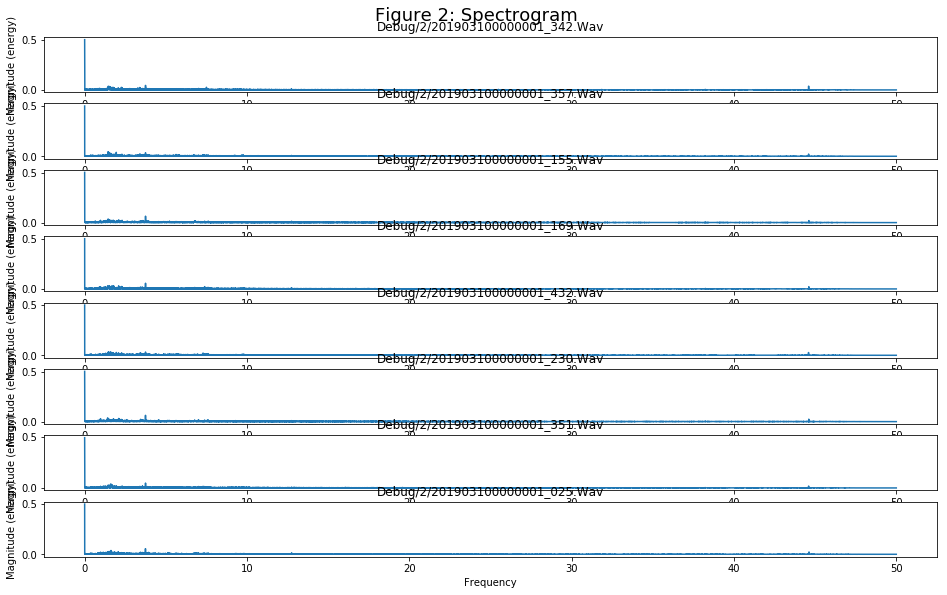

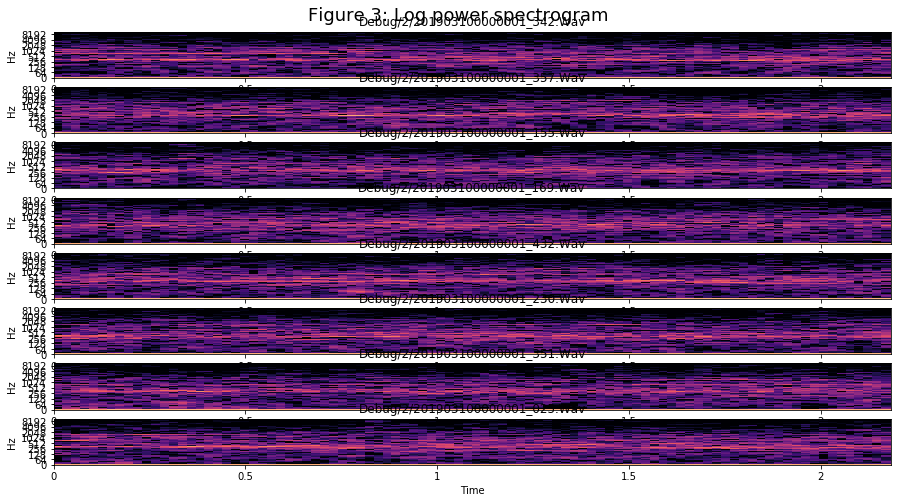

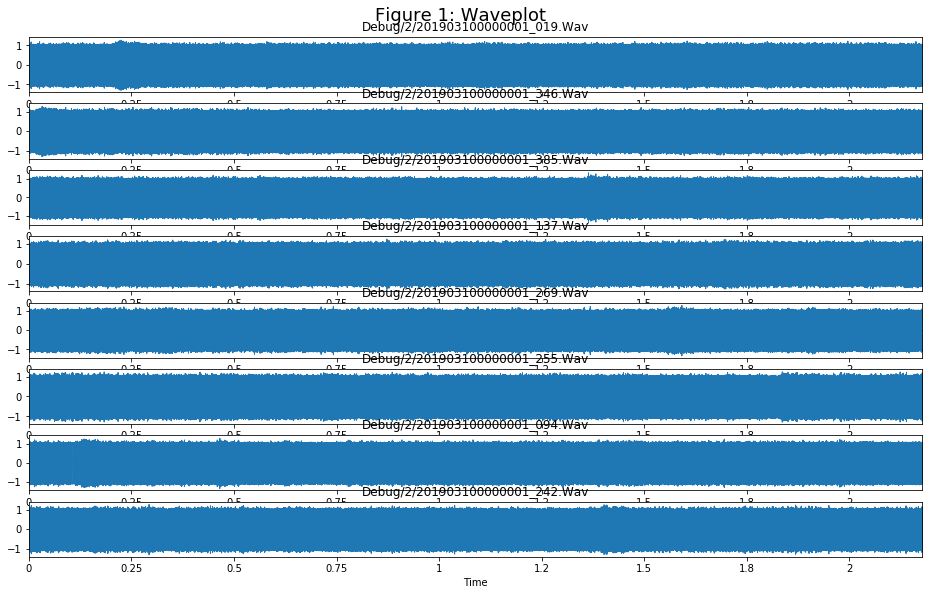

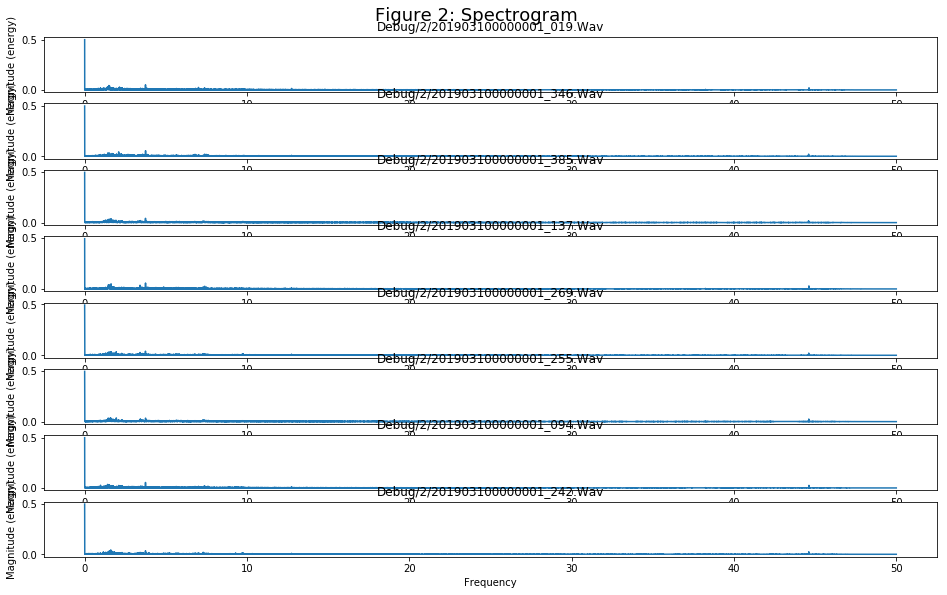

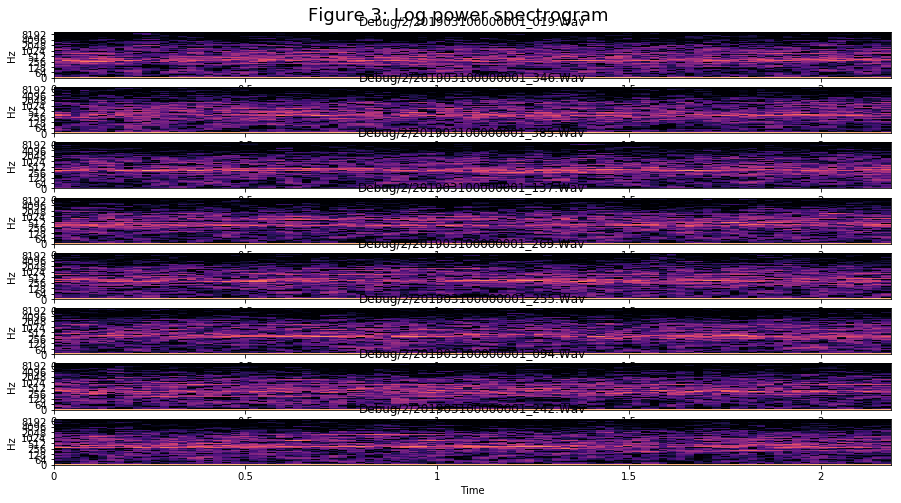

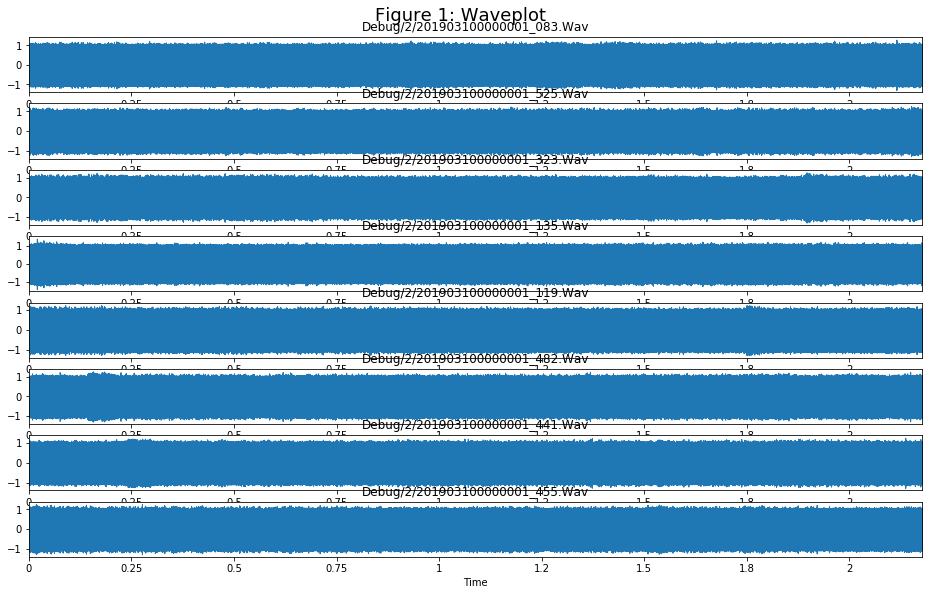

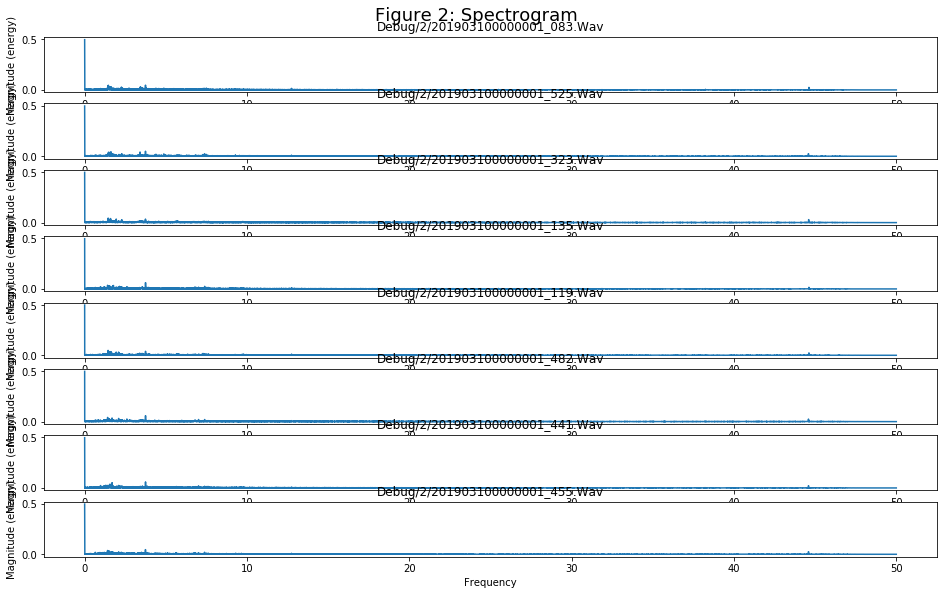

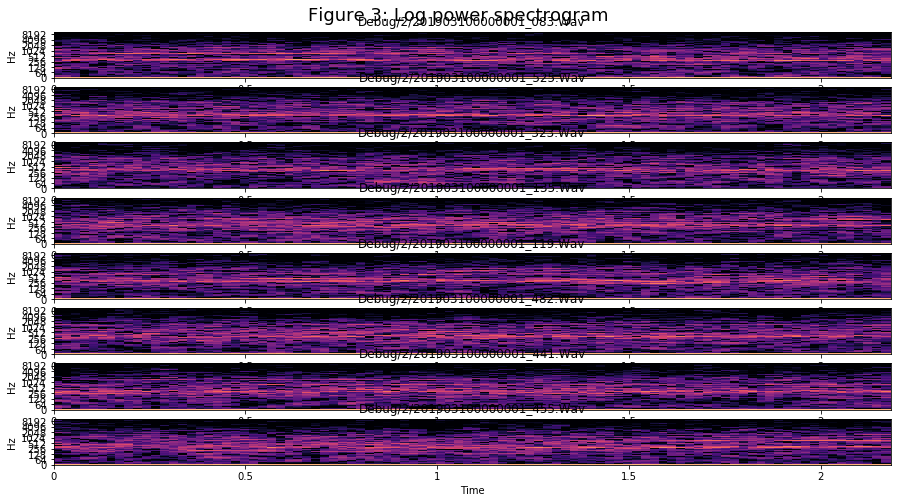

('done : ', 'Run time: 2019-04-05 12:06:16')


In [1]:
#encoding utf8 
# reference: https://www.kdnuggets.com/2016/09/urban-sound-classification-neural-networks-tensorflow.html
# http://aqibsaeed.github.io/2016-09-03-urban-sound-classification-part-1/
import glob
import os
import time
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import normalize

import tensorflow as tf
from matplotlib.pyplot import specgram,magnitude_spectrum

%matplotlib inline

def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        print (fp, X.shape, sr)
        raw_sounds.append(X)
        print ("load file :",fp, len(X))    
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    #fig = plt.figure(figsize=(25,60), dpi = 900)
    fig = plt.figure(figsize=(16,12))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 1: Waveplot',x=0.5, y=0.915,fontsize=18)
    #plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(16,12)) # , dpi = 900
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        #specgram(np.array(f), Fs=22050)
        magnitude_spectrum(np.array(f), Fs=100)
        #print "specgram"
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 2: Spectrogram',x=0.5, y=0.915,fontsize=18)
    #plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(15,10)) # , dpi = 900
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        #D = librosa.amplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(f))**2)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 3: Log power spectrogram',x=0.5, y=0.915,fontsize=18)
    #plt.show()

def plot_snd(filename):
    print("plot files:",filename)
    raw_sounds = load_sound_files(filename)
    plot_waves(filename,raw_sounds)
    plot_specgram(filename,raw_sounds)
    plot_log_power_specgram(filename,raw_sounds)
        
def t2():
    #audio_path=librosa.util.example_audio_file()
    audio_path = "/root/pyAudioAnalysis/data/doremi.wav"
    X,sr = librosa.load(audio_path)
    #print (X, sr)
    print(type(X) , type(sr))
    print(X.shape , sr)

    
print("start on:",time.strftime('Run time: %Y-%m-%d %H:%M:%S'))
snds = ["samples/h38~07-21~1~01-54-26.mp3","samples/25-1~07-21~1~00-35-21.mp3",
        "samples/err1.wav","samples/err2.wav","samples/err3.wav","samples/err4.wav"]
        
#snds = ["debug/err1_007.wav","debug/err1_017.wav","debug/err1_022.wav","debug/err1_034.wav","debug/err1_039.wav"]    
snds = glob.glob("debug/2/*.wav")

#print "check files:", snds
plot_snd(snds[:8])
plot_snd(snds[8:16])
plot_snd(snds[16:24])
#plot_snd(["../sound/samples_1/err1.wav","../sound/samples_1/err2.wav"])

plt.show()
print("done : ",time.strftime('Run time: %Y-%m-%d %H:%M:%S'))



In [ ]:
import glob
test_files  = glob.glob("samples/*.wav")
print test_files